In [5]:
# Load the dataset
import pandas as pd
d=pd.read_csv('/content/penguins_size.csv')
d

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


VISUALIZATIONS

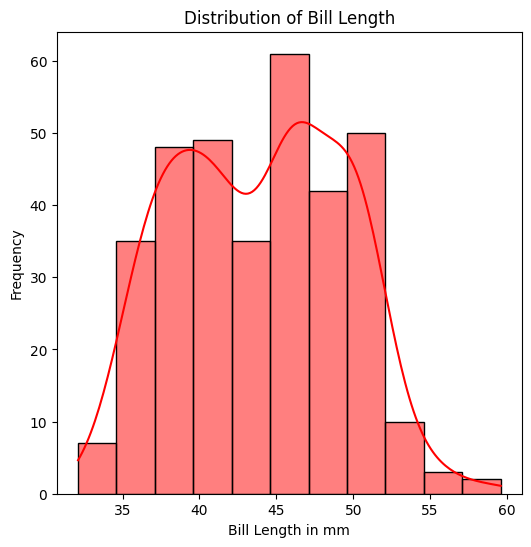

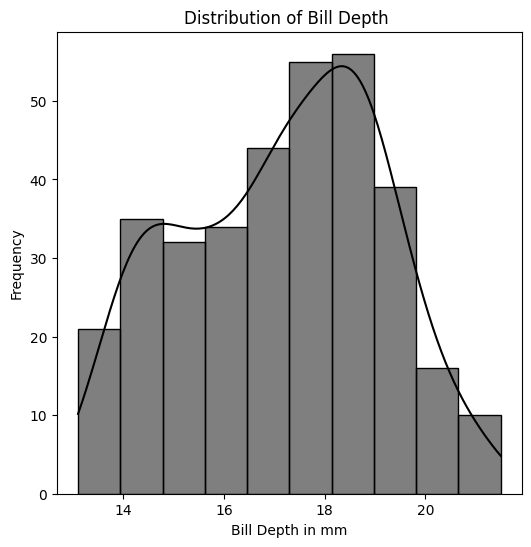

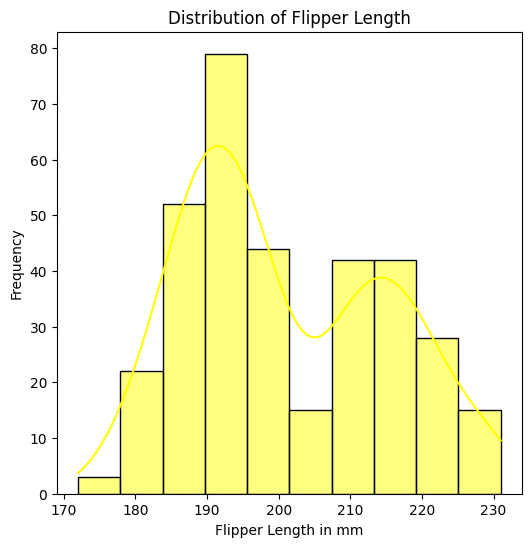

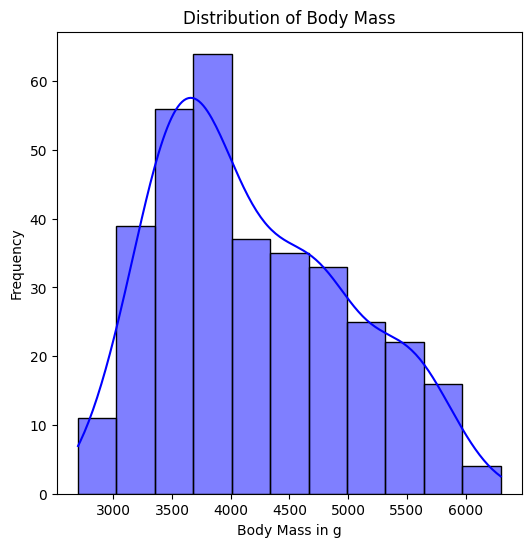

In [ ]:
# Univariate Analysis for 'bill_length_mm'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.histplot(d['culmen_length_mm'], kde=True, color='red')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length in mm')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis for 'bill_depth_mm'
plt.figure(figsize=(6,6))
sns.histplot(d['culmen_depth_mm'], kde=True, color='black')
plt.title('Distribution of Bill Depth ')
plt.xlabel('Bill Depth in mm')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis for'flipper_length_mm'
plt.figure(figsize=(6,6))
sns.histplot(d['flipper_length_mm'], kde=True, color='yellow')
plt.title('Distribution of Flipper Length')
plt.xlabel('Flipper Length in mm')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis for 'body_mass_g'
plt.figure(figsize=(6,6))
sns.histplot(d['body_mass_g'], kde=True, color='blue')
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass in g')
plt.ylabel('Frequency')
plt.show()

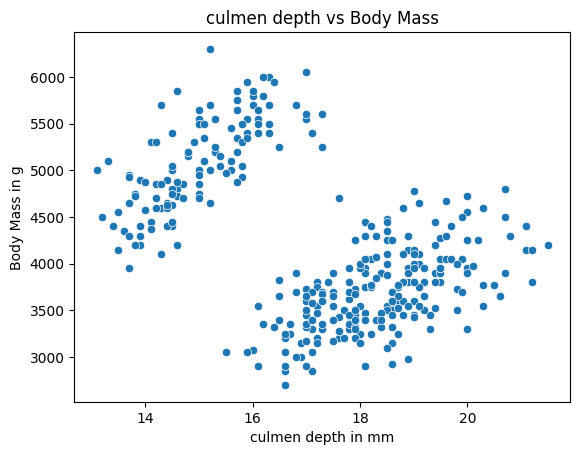

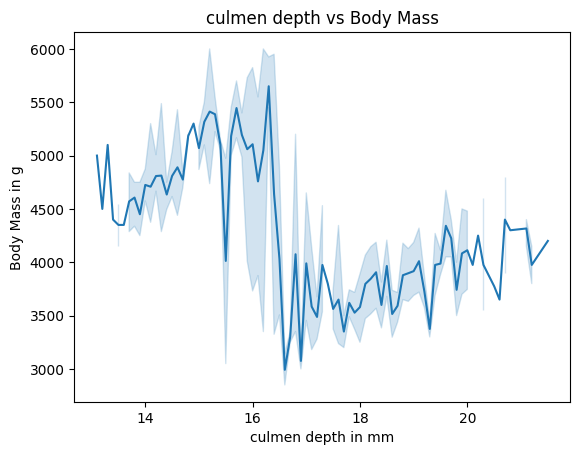

In [ ]:
#Bivariate Analysis
sns.scatterplot(x='culmen_depth_mm', y='body_mass_g', data=d)
plt.title('culmen depth vs Body Mass')
plt.xlabel('culmen depth in mm')
plt.ylabel('Body Mass in g')
plt.show()

sns.lineplot(x= d.culmen_depth_mm, y=d.body_mass_g)
plt.title('culmen depth vs Body Mass')
plt.xlabel('culmen depth in mm')
plt.ylabel('Body Mass in g')
plt.show()

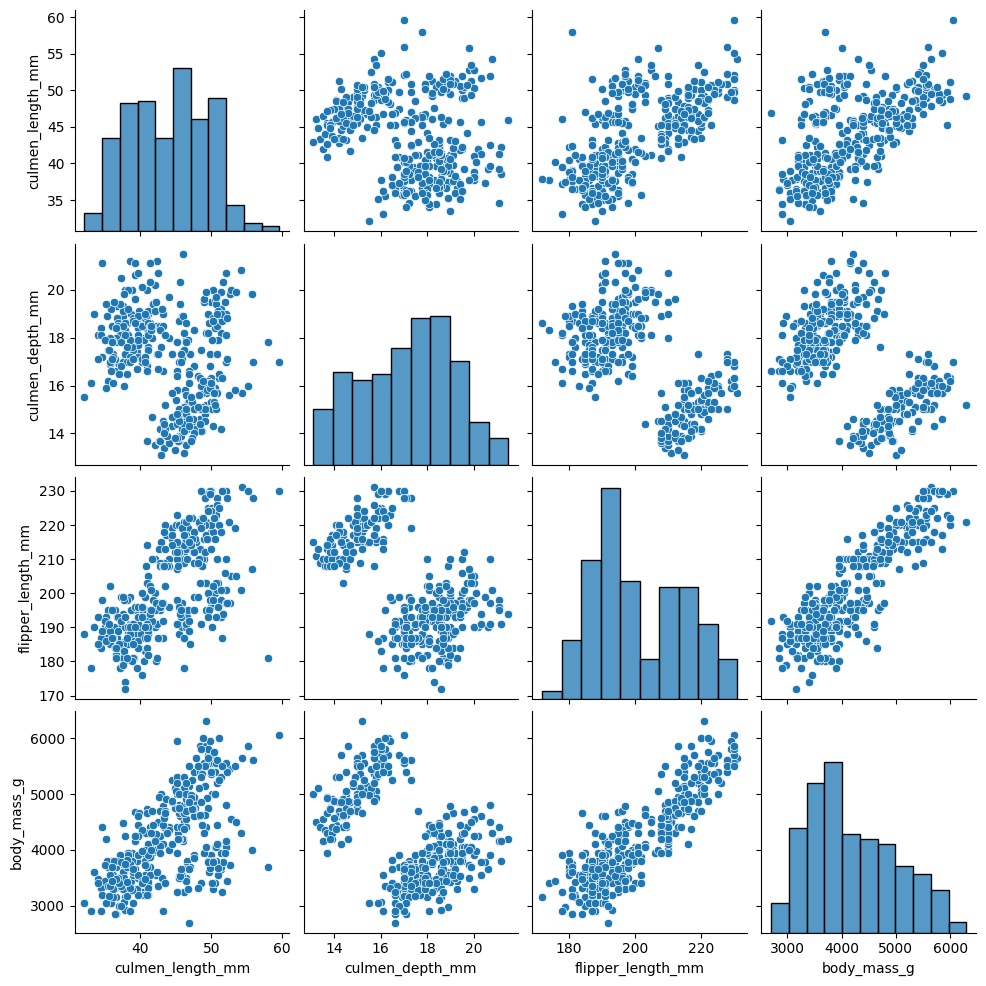

In [ ]:
#Multivariate Analysis
sns.pairplot(d)

<ipython-input-16-0884308ee98d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(),annot =True)


<Axes: >

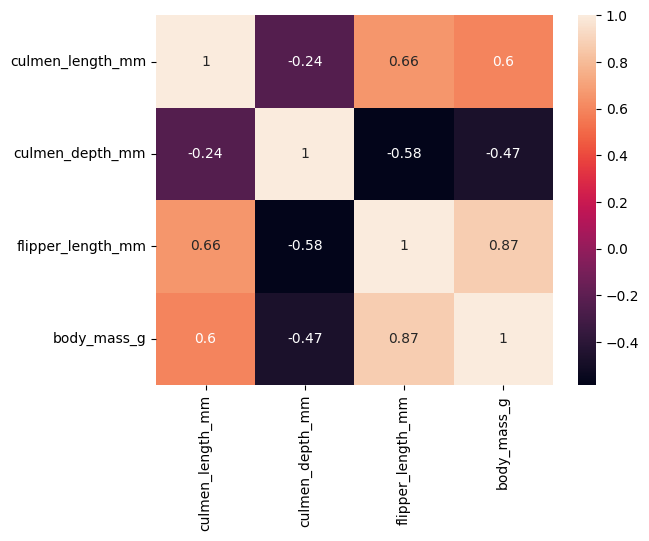

In [ ]:
sns.heatmap(d.corr(),annot =True)

In [ ]:
#descriptive statistics
print(d.describe())
d.info()

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64

In [ ]:
# correlation of the data
correlation_matrix = d.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


In [ ]:
#Check for Missing values and deal with them
missing_values = d.isnull().sum()
print("Missing Values:")
print(missing_values)

d.dropna(inplace=True)
print("\nAfter dealing with missing values:")
print(d.isnull().sum())

Missing Values:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

After dealing with missing values:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
#outliers and replace them
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outlier, column] = df[column].median()

numerical_columns = d.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    outliers(d, column)

print("After replacing outliers:")
print(d.describe())


After replacing outliers:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000


Categorical columns and perform encoding

In [ ]:
categorical = d.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical)

encoded_data = pd.get_dummies(d, columns=categorical)

print("\nEncoded Data:")
print(encoded_data.head())

Categorical Columns:
Index(['species', 'island', 'sex'], dtype='object')

Encoded Data:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0               1                  0               0              0   
1               1                  0               0              0   
2               1                  0               0              0   
4               1                  0               0              0   
5               1                  0               0              0   

   island_Dream  island_Torgersen  sex_.  sex_FEMALE

. Split the data into dependent and independent variables

In [ ]:
X = d.drop(columns=['species'])
y = d['species']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
      island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen              39.1             18.7              181.0   
1  Torgersen              39.5             17.4              186.0   
2  Torgersen              40.3             18.0              195.0   
4  Torgersen              36.7             19.3              193.0   
5  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  

Target (y):
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
categorical_columns = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_processed)

scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X_processed)

print("Min-Max Scaled Features:")
print(pd.DataFrame(X_scaled_minmax).head())
print("\nStandardized (Z-score Scaled) Features:")
print(pd.DataFrame(X_scaled_standard).head())

Min-Max Scaled Features:
     0    1    2    3    4    5         6         7         8         9
0  0.0  0.0  1.0  0.0  0.0  1.0  0.254545  0.666667  0.152542  0.291667
1  0.0  0.0  1.0  0.0  1.0  0.0  0.269091  0.511905  0.237288  0.305556
2  0.0  0.0  1.0  0.0  1.0  0.0  0.298182  0.583333  0.389831  0.152778
3  0.0  0.0  1.0  0.0  1.0  0.0  0.167273  0.738095  0.355932  0.208333
4  0.0  0.0  1.0  0.0  0.0  1.0  0.261818  0.892857  0.305085  0.263889

Standardized (Z-score Scaled) Features:
          0         1        2       3         4         5         6  \
0 -0.982194 -0.763504  2.47111 -0.0548 -0.988095  0.994030 -0.897653   
1 -0.982194 -0.763504  2.47111 -0.0548  1.012049 -1.006006 -0.824290   
2 -0.982194 -0.763504  2.47111 -0.0548  1.012049 -1.006006 -0.677564   
3 -0.982194 -0.763504  2.47111 -0.0548  1.012049 -1.006006 -1.337831   
4 -0.982194 -0.763504  2.47111 -0.0548 -0.988095  0.994030 -0.860972   

          7         8         9  
0  0.783487 -1.429521 -0.571229  
1

. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (267, 6) (267,)
Testing set shape (X_test, y_test): (67, 6) (67,)


 Train the Model,Evaluate your model,Test the Model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#Building model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print(classification_report(y_test, y_pred))

In [ ]:
Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67
